In [3]:
!pip install tcia-utils > /dev/null
!pip install tensorflow-io > /dev/null

import os
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_io as tfio

from tcia_utils import nbia
from tqdm import tqdm

In [2]:
#nbia.getCollections()
data = nbia.getSeries(collection = "CBIS-DDSM")
filtered_data = [d for d in data if d['SeriesDescription'] == 'full mammogram images']

progress_bar = tqdm(filtered_data, desc="Downloading", ncols=100)

df = nbia.downloadSeries(progress_bar, number=500, format="df")
display(df)

Downloading:  16%|███████▏                                     | 499/3103 [58:06<5:03:16,  6.99s/it]


,Series UID,Collection,Data Description URI,Subject ID,Study UID,Study Date,Series Description,Modality,SOP Class UID,Number of Images,File Size,File Location,Series Number,License Name,License URL,Annotation Size
0,1.3.6.1.4.1.9590.100.1.2.370020768811676220424...,CBIS-DDSM,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_01239_RIGHT_CC,1.3.6.1.4.1.9590.100.1.2.304153155112070673724...,07-20-2016,full mammogram images,MG,1.2.840.10008.5.1.4.1.1.7,1,18879288,DDSM,1.000000,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,0
1,1.3.6.1.4.1.9590.100.1.2.226129505812120883531...,CBIS-DDSM,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_01694_RIGHT_CC,1.3.6.1.4.1.9590.100.1.2.825438183121120529123...,07-20-2016,full mammogram images,MG,1.2.840.10008.5.1.4.1.1.7,1,16015308,DDSM,1.000000,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,0
2,1.3.6.1.4.1.9590.100.1.2.408053815012156684010...,CBIS-DDSM,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_00719_LEFT_CC,1.3.6.1.4.1.9590.100.1.2.141935267011404411920...,07-20-2016,full mammogram images,MG,1.2.840.10008.5.1.4.1.1.7,1,20381896,DDSM,1.000000,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,0
3,1.3.6.1.4.1.9590.100.1.2.392091931911637760938...,CBIS-DDSM,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_00009_RIGHT_CC,1.3.6.1.4.1.9590.100.1.2.348094436212980762312...,07-20-2016,full mammogram images,MG,1.2.840.10008.5.1.4.1.1.7,1,19594788,DDSM,1.000000,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,0
4,1.3.6.1.4.1.9590.100.1.2.388945630510803488442...,CBIS-DDSM,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_01503_LEFT_CC,1.3.6.1.4.1.9590.100.1.2.147891377712683138606...,07-20-2016,full mammogram images,MG,1.2.840.10008.5.1.4.1.1.7,1,20250078,DDSM,1.000000,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.3.6.1.4.1.9590.100.1.2.465159536116450408405...,CBIS-DDSM,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_01052_LEFT_MLO,1.3.6.1.4.1.9590.100.1.2.229127665213332539234...,07-20-2016,full mammogram images,MG,1.2.840.10008.5.1.4.1.1.7,1,23834954,DDSM,1.000000,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,0
496,1.3.6.1.4.1.9590.100.1.2.171218457111705120809...,CBIS-DDSM,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_00869_LEFT_MLO,1.3.6.1.4.1.9590.100.1.2.233654793411854816724...,07-20-2016,full mammogram images,MG,1.2.840.10008.5.1.4.1.1.7,1,25902922,DDSM,1.000000,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,0
497,1.3.6.1.4.1.9590.100.1.2.340775804311000418009...,CBIS-DDSM,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_00160_RIGHT_MLO,1.3.6.1.4.1.9590.100.1.2.315025815312003164908...,07-20-2016,full mammogram images,MG,1.2.840.10008.5.1.4.1.1.7,1,27142222,DDSM,1.000000,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,0
498,1.3.6.1.4.1.9590.100.1.2.425607717210627847042...,CBIS-DDSM,https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY,Mass-Training_P_00859_LEFT_MLO,1.3.6.1.4.1.9590.100.1.2.309395487212078797206...,07-20-2016,full mammogram images,MG,1.2.840.10008.5.1.4.1.1.7,1,34751570,DDSM,1.000000,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,0


In [4]:
root_dir = '/content/tciaDownload/'
images = []

for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if file.endswith('.dcm'):
            images.append(os.path.join(subdir, file))

print(f"Total images: {len(images)}")

Total images: 500


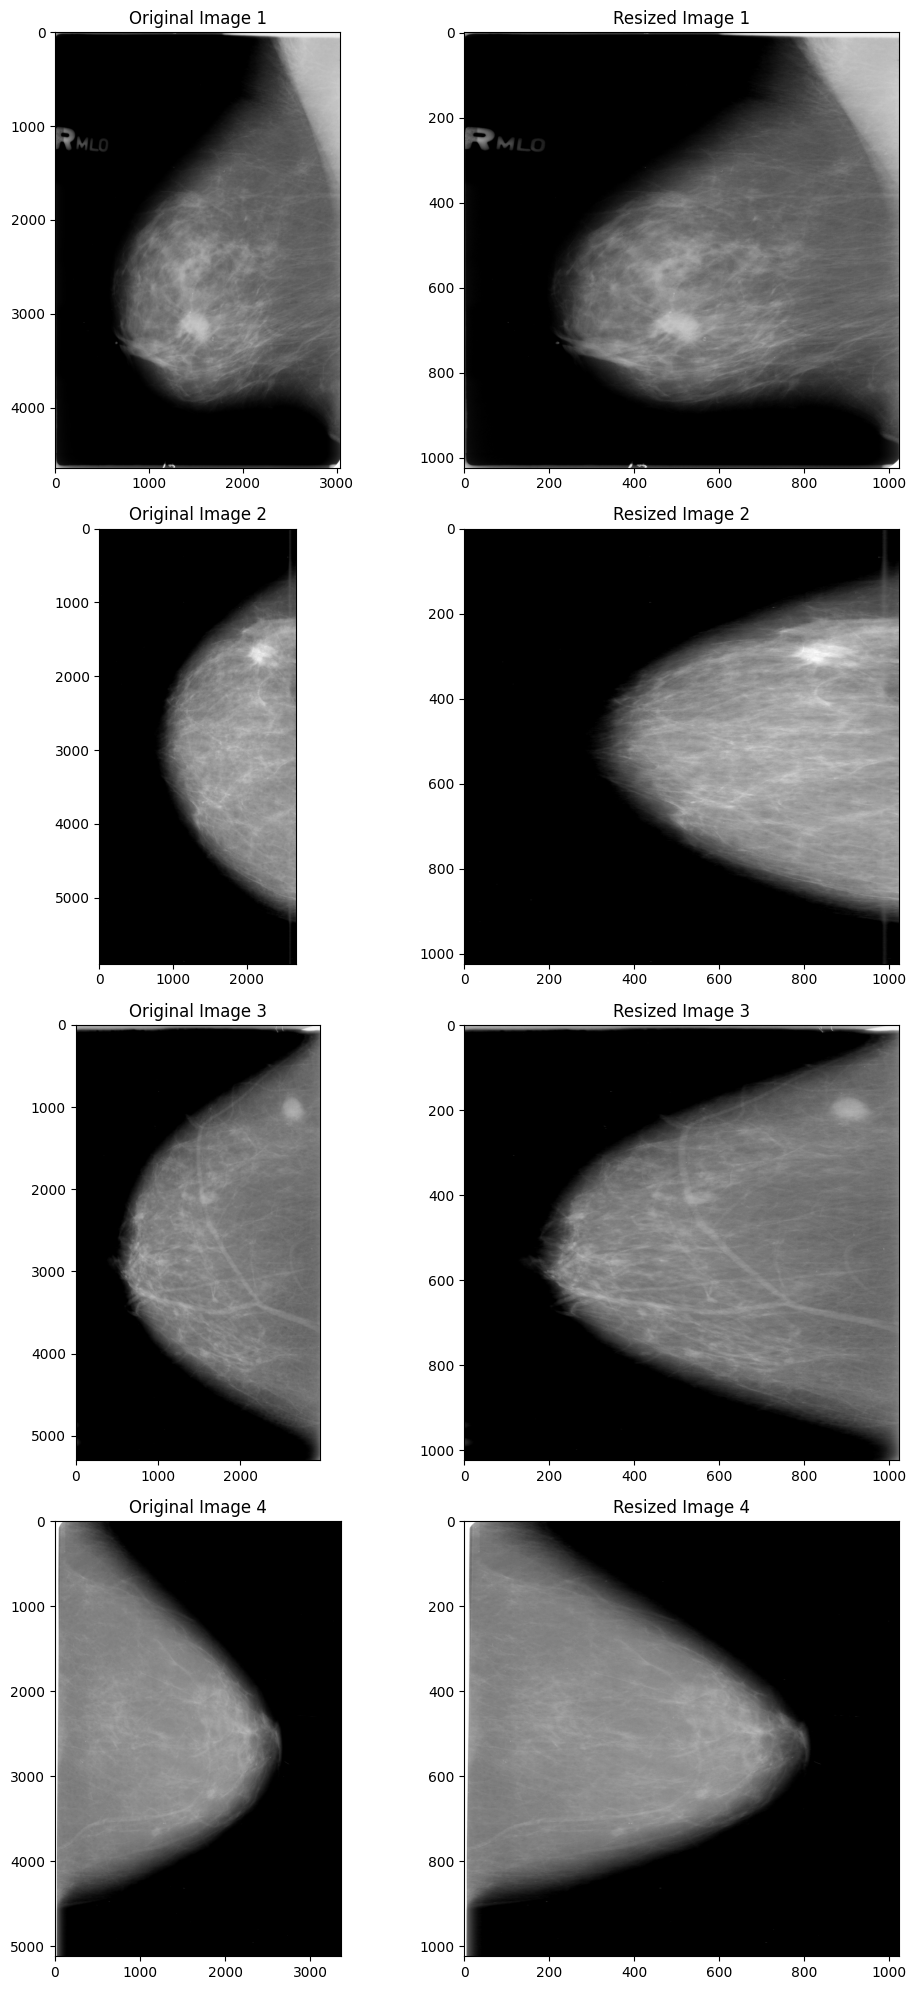

In [8]:
# Select 4 random image paths
random_images = random.sample(images, 4)

# Set up the grid for displaying images
fig, axes = plt.subplots(4, 2, figsize=(10, 20))
axes = axes.ravel()

# Read and display each random image
for idx, image_path in enumerate(random_images):
    image_bytes = tf.io.read_file(image_path)
    image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)
    resized_image = tf.image.resize(image, [1024, 1024], method=tf.image.ResizeMethod.BILINEAR)

    # Display the original image
    axes[2 * idx].imshow(np.squeeze(image.numpy()), cmap='gray')
    axes[2 * idx].set_title(f"Original Image {idx + 1}")

    # Display the resized image
    axes[2 * idx + 1].imshow(np.squeeze(resized_image.numpy()), cmap='gray')
    axes[2 * idx + 1].set_title(f"Resized Image {idx + 1}")

# Adjust the layout and display the images
plt.tight_layout()
plt.show()